<a href="https://colab.research.google.com/github/alvitay/Hotel-Booking-Cancellation-Prediction/blob/main/Hotel_Booking_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Project - Hotel Booking Cancellation Prediction**

----------------------------
## **Objective**
-----------------------------

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not. The class 0 represents the Not_Canceled whereas class 1 represents the Canceled label.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel = pd.read_csv("/content/drive/MyDrive/Hotel/INNHotelsGroup.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

### **View the first and the last 5 rows of the dataset**

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Checking the info of the data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**.

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [8]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis.
- Let's drop this column.

### **Dropping the Booking_ID column**

In [9]:
data = data.drop(["Booking_ID"], axis = 1)

In [10]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

In [11]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:**

* The number of adults booking the hotel ranges from 0 to 4, which is usual. At least 75% of bookings have 2 adults.
* Majority of the bookings have no children. This indicates that the most of the bookings might be from single people or young couples. The maximum value in the number of children column is 10, which is a bit unusual and might be an outlier.
* The maximum values for the number of weeks and weekend nights are 7 weekends or 17 nights. These might be very long stays. We can explore these values further.
* At least 75% of the customers do not require a car parking space. This indicates that the majority of the customers are traveling by personal vehicles.
* On average, the customers book 85 days in advance. There's also a very huge difference in 75th percentile and the maximum value which indicates that there might be outliers present in this column.
* The arrival year shows that we have the data from two years - 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* At least 75% of bookings have no previous cancellations. The number of previous cancellations has a maximum value of 13.
* The mean of the column avg_price_per_room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column. There are also 0 values in this column, let's check these values.

In [12]:
# Checking the rows where the avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [13]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

,count
market_segment_type,
Complementary,354
Online,191


**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Checking the distribution and outliers for numerical columns in the data**

lead_time
Skew : 1.29


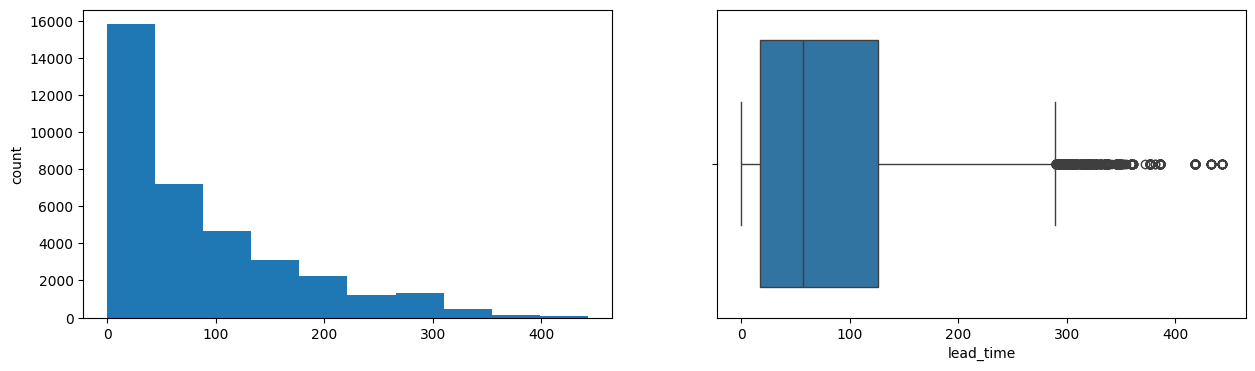

no_of_previous_cancellations
Skew : 25.2


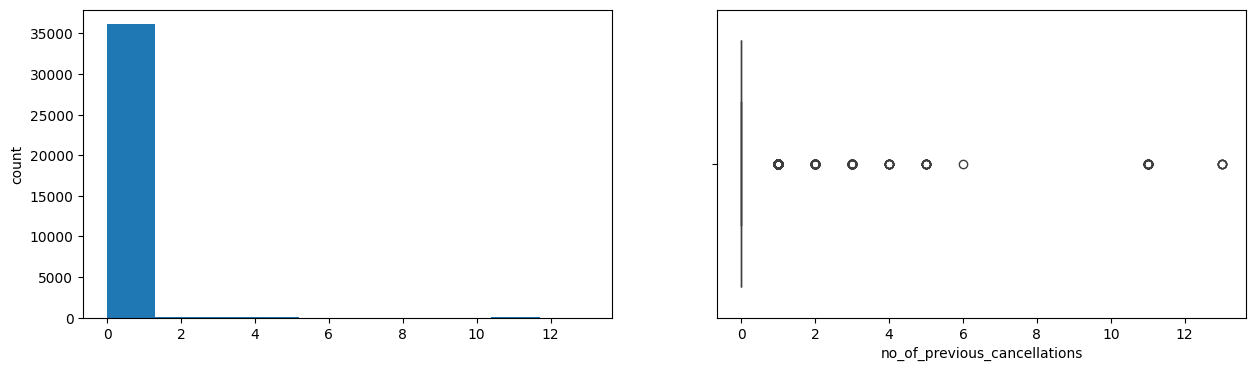

no_of_previous_bookings_not_canceled
Skew : 19.25


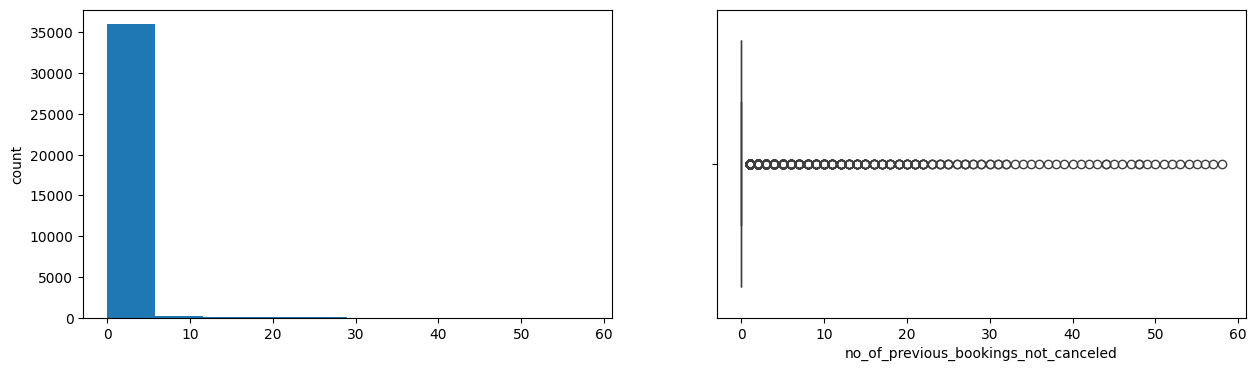

avg_price_per_room
Skew : 0.67


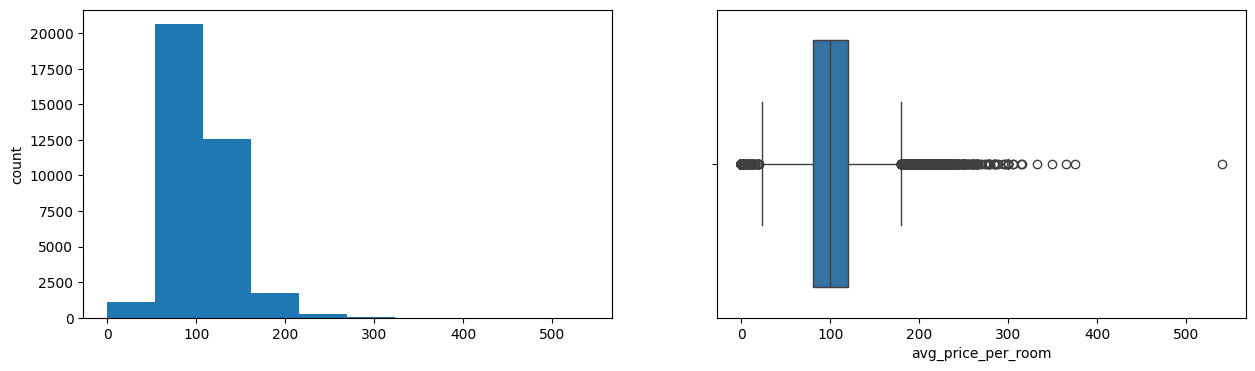

In [14]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1,2,1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

- The distribution of **lead time is right-skewed** implies the majority of customer make bookings close to the arrival date. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**.
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**.
- **The distribution of average price per room is skewed to right**. The boxplot shows that there are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [15]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR

Upper_Whisker

179.55

In [16]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Now, let's check the percentage of each category for categorical variables.**

In [17]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space',
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests',
        'booking_status']

for col in cat_cols:
    print(data[col].value_counts(normalize = True))  # The parameter normalize = True gives the percentage of each category
    print('*'*40)                                    # Print the * 40 times to separate different variables

no_of_adults
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: proportion, dtype: float64
****************************************
no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64
****************************************
no_of_week_nights
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: proportion, dtype: float64
****************************************
no_of_weekend_nights
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: proportion, dtype: float64
****************************************
required_car_parking_space
0    0.969014
1    0.030986
Name: proportion, dtype: float64
*******

**Observations:**

* ~72% of the bookings were made for 2 adults. There are some observations with 0 adults as well, it is possible that an adult made the booking for children.

* 93% of the customers didn't make reservations for children. There are some values in the data where the number of children is 9 or 10, which is unusual. We will replace these values with the maximum value before 9, i.e., 3 children.

* Most bookings are made for 2 nights (~31.5%) followed by 1 night (26.1%). A very less proportion of customers made the booking for 8 or more days.

* 46.5% of the customers do not plan to spend the weekend in the hotel. The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same.

* ~97% of the customers do not require a car parking space.

* Most of the customers prefer meal plan 1 that is only breakfast. ~14% of the customers didn't select a meal plan.

* ~77% of the customers booked Room_Type 1 followed by ~17% of the customers booking Room_Type 4.

* October is the busiest month for the hotel followed by September. ~14.7% of the bookings were made in October. It would be interesting to see whether months with a higher number of bookings have higher cancellations as well or not.

* ~64% of the hotel bookings were made online followed by 29% of the bookings which were made offline.

* ~54.5% of the customers generally do not make any special requests while booking a hotel room.

* ~32.8% of the bookings were canceled by the customers. We can encode Canceled bookings as 1 and Not_Canceled as 0 for further analysis.

### **Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [18]:
# Replacing values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [19]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

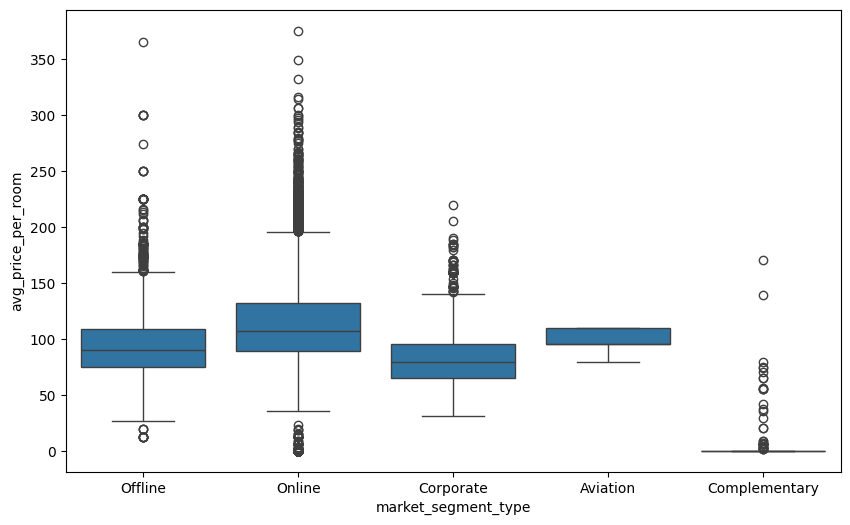

In [20]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

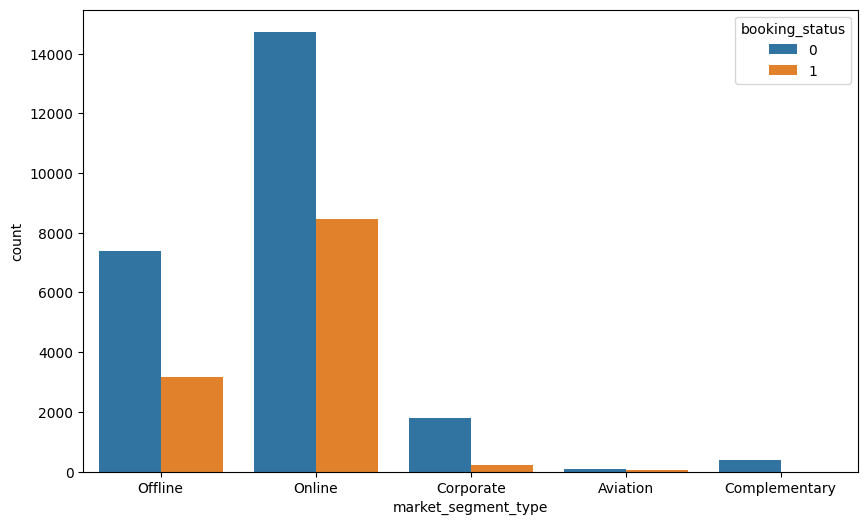

In [21]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment also show a very low number of cancellations.

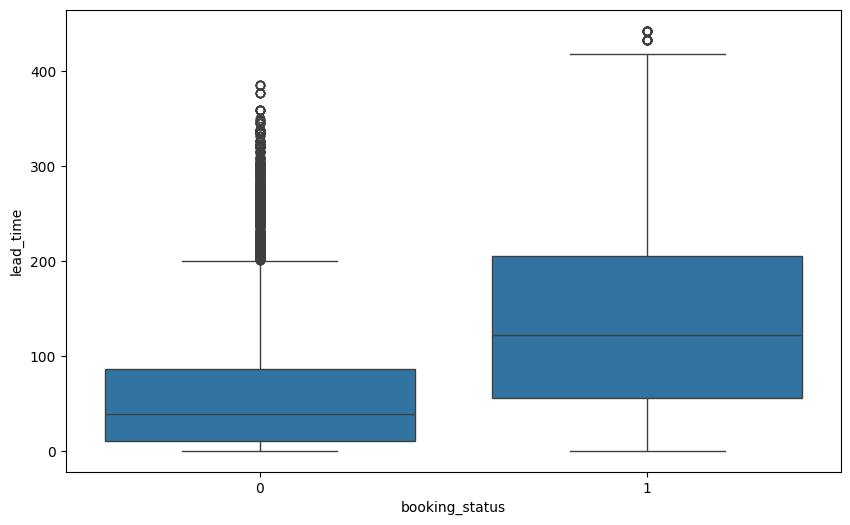

In [22]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
- **The higher the lead time, the higher are the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status.**

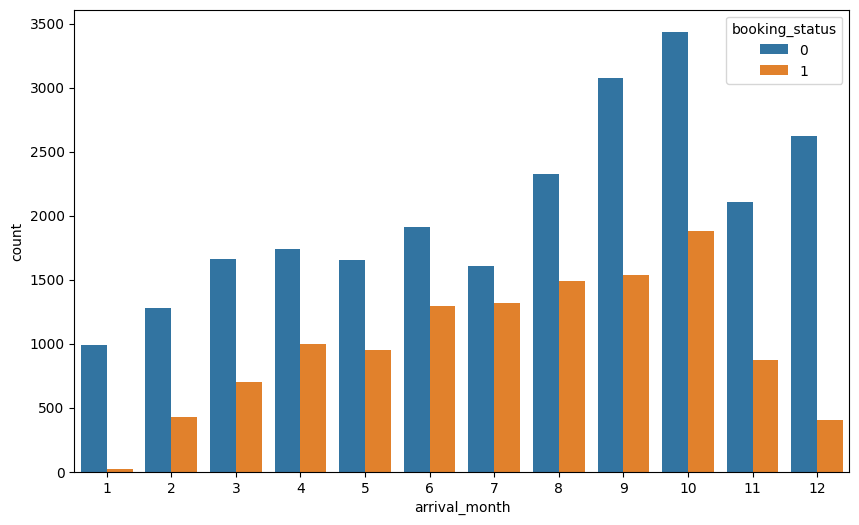

In [23]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are least prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel bookings?**

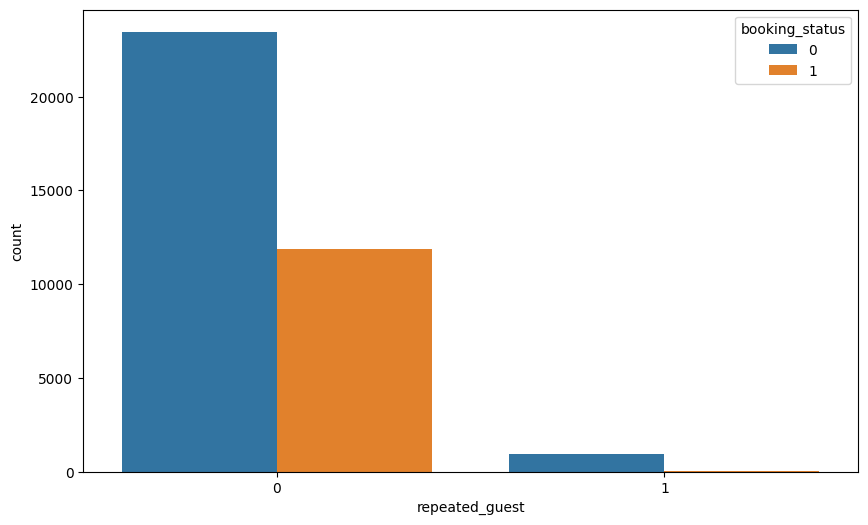

In [24]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are **very few repeat customers but the cancellation among them is very less**.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

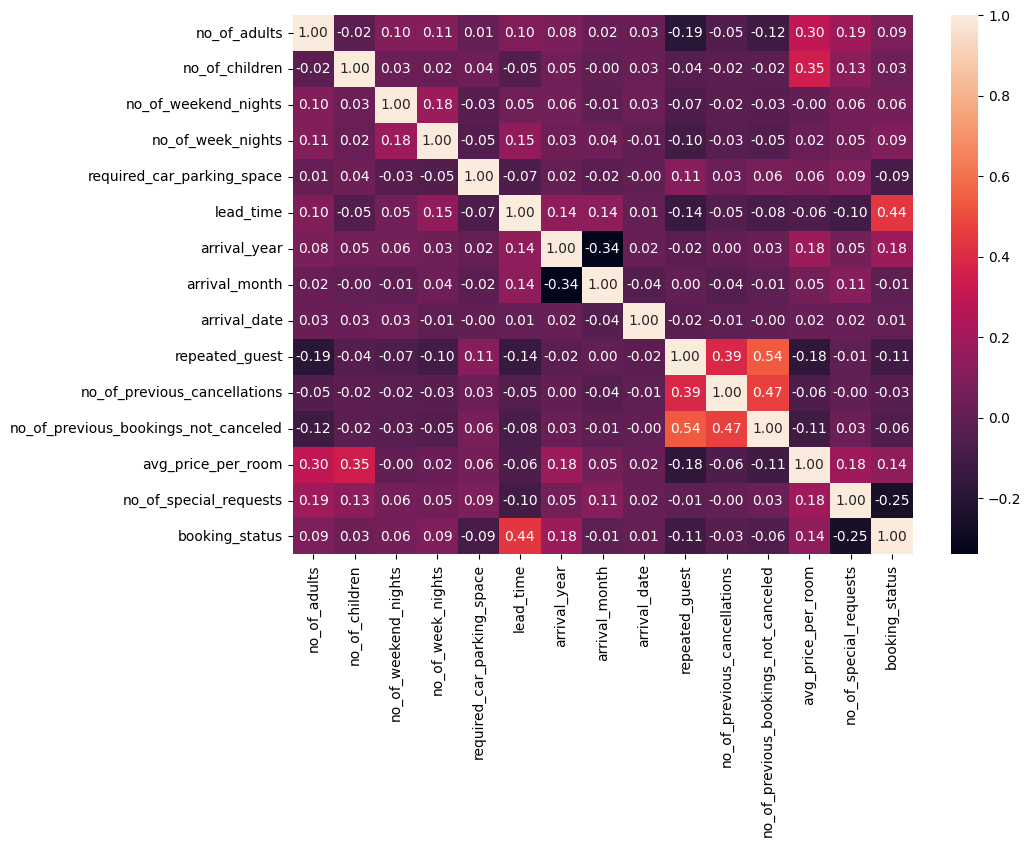

In [25]:
plt.figure(figsize=(10, 7))

# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")

plt.show()


**Observations:**

* There's a **weak positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more the price of the rooms.
* There's a **weak negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a weak positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a weak negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**.

**Now that we have explored our data, let's prepare it for modeling.**

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [26]:
# Separating the target variable and other variables
X = data.drop(columns = 'booking_status')
Y = data['booking_status']

In [27]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [28]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking.

**Which case is more important?**
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [29]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

### **Decision Tree**

In [30]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



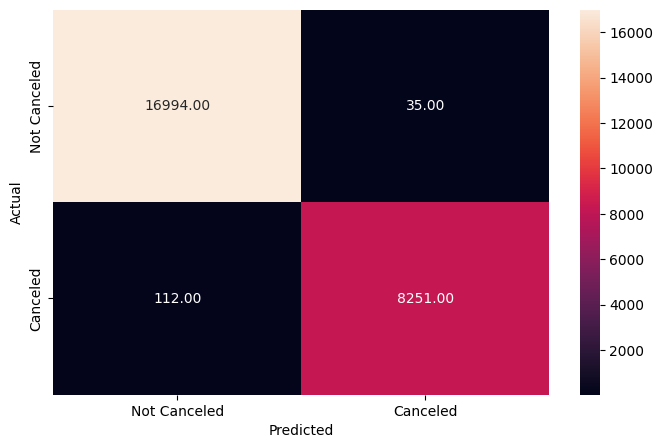

In [31]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:**

* There is less error on the training set, i.e., each sample has been classified correctly except few points. The model has performed very well on the training set.
* As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied, as the trees will learn all the patterns in the training set. So, it can easily overfit the training data.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7361
           1       0.80      0.81      0.81      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.86      0.86     10883
weighted avg       0.87      0.87      0.87     10883



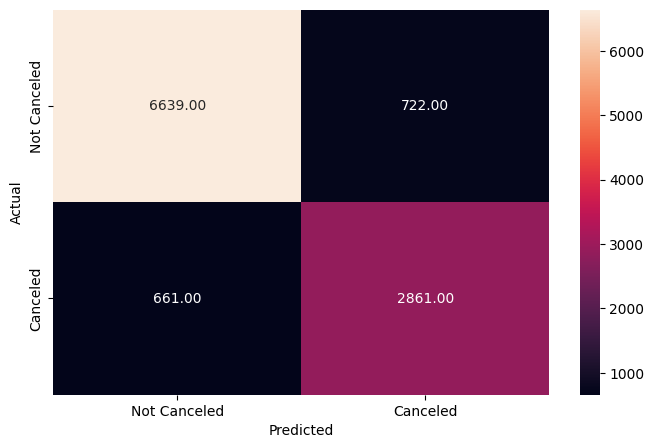

In [32]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

* The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [33]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     17029
           1       0.74      0.87      0.80      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.86      0.85     25392
weighted avg       0.87      0.86      0.86     25392



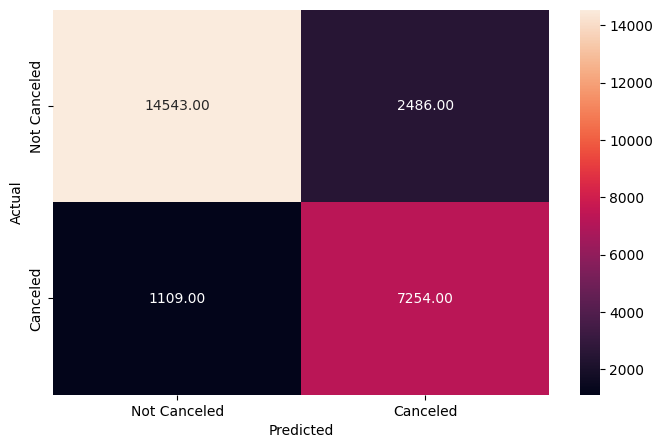

In [34]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
- We can see that the **performance on the training data has decreased** which can be expected as we are trying not to overfit the training dataset.
- **The model can able to identify the majority of Hotel booking Cancellations.**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7361
           1       0.72      0.84      0.78      3522

    accuracy                           0.84     10883
   macro avg       0.82      0.84      0.83     10883
weighted avg       0.85      0.84      0.85     10883



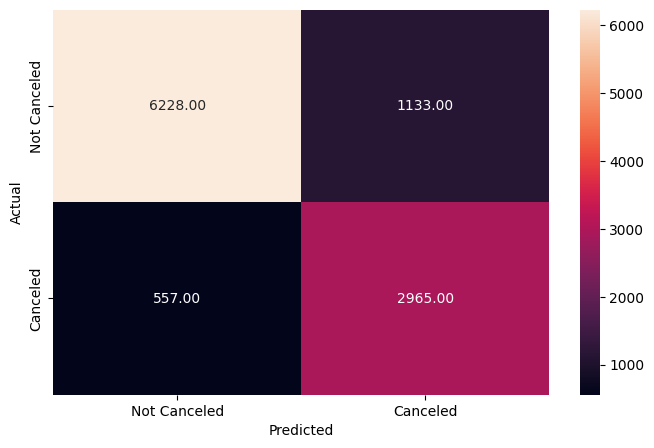

In [35]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**
- We can observe that the **recall for class 1 has increased but the precision has decreased.**
- **The overfitting has reduced significantly and now the model is performing more generlized on both training and testing data.**

**Let's visualize the tuned decision tree** and observe the decision rules:

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [36]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

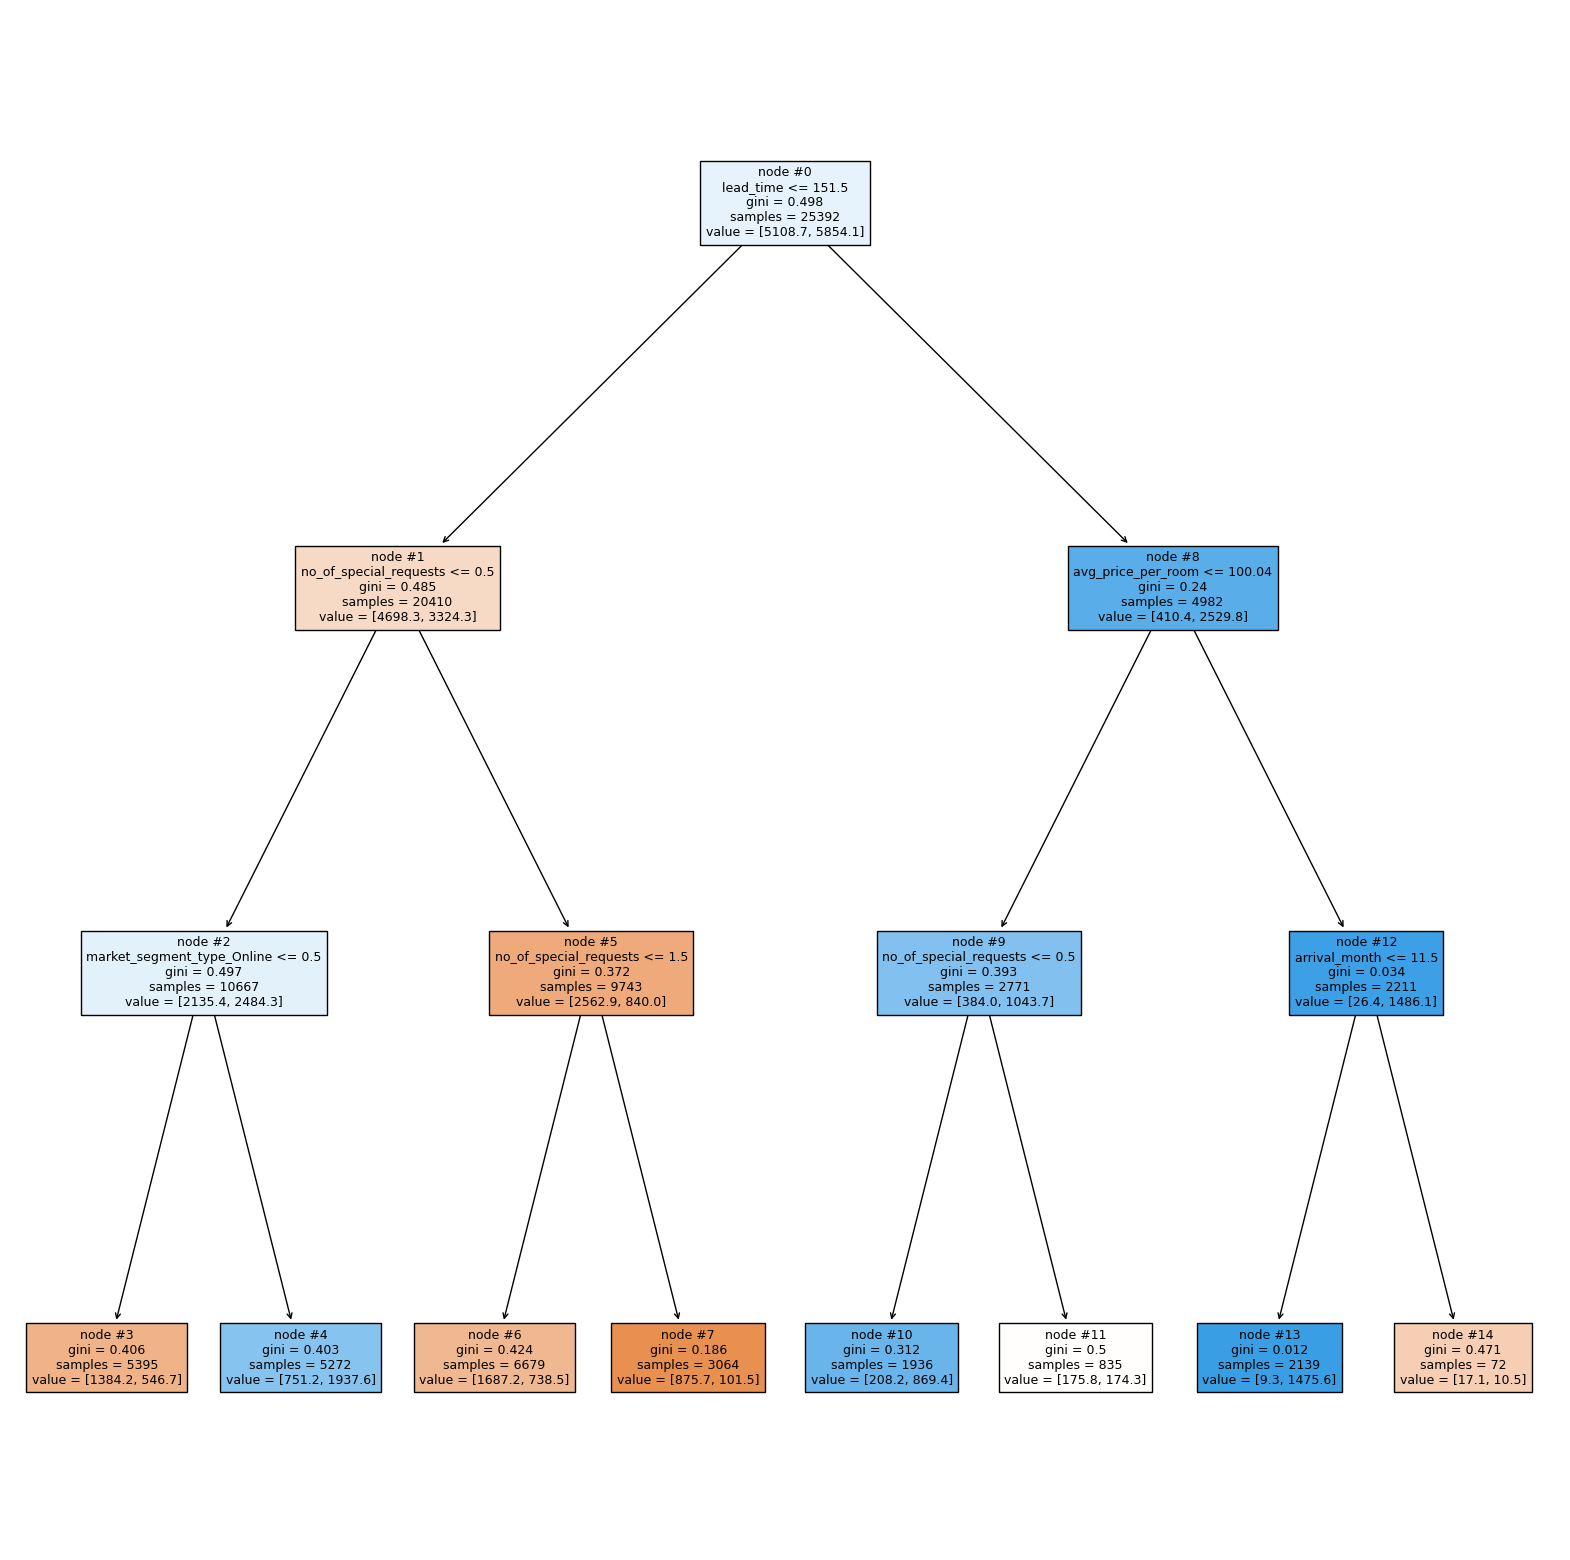

In [37]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = None)

plt.show()

**Note:** Blue leaves represent the hotels that were about to be canceled, i.e., **y[1]**, while the light orange leaves represent the hotels that were not canceled, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
- **The first split in the decision tree is at lead_time** which implies that it is one of the most important factors in deciding whether the booking will be canceled or not.
- As per decision rules, customers whose lead time is lesser, are less likely to cancel the hotel booking.
- Among the customers whose lead time is higher and the average price of the room is ~ 100 euros then he/she is more likely to cancel the hotel booking.
- Among the customers whose lead time is higher, the average price of the room is ~ 100 euros and the arrival_month is less than 11.5 then he/she is more likely to cancel the hotel booking.

**Let's look at the feature importance** of the tuned decision tree model

In [38]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                             4.098536e-01
market_segment_type_Online            1.580689e-01
no_of_special_requests                1.454057e-01
avg_price_per_room                    1.024682e-01
arrival_month                         4.743526e-02
no_of_adults                          2.340166e-02
no_of_weekend_nights                  2.309086e-02
arrival_date                          2.097479e-02
arrival_year                          2.029044e-02
no_of_week_nights                     1.882969e-02
required_car_parking_space            1.191985e-02
market_segment_type_Offline           1.153020e-02
type_of_meal_plan_Not Selected        3.108101e-03
type_of_meal_plan_Meal Plan 2         1.838672e-03
room_type_reserved_Room_Type 4        1.003484e-03
room_type_reserved_Room_Type 2        4.634746e-04
room_type_reserved_Room_Type 5        2.029372e-04
no_of_children                        1.141425e-04
repeated_guest                 

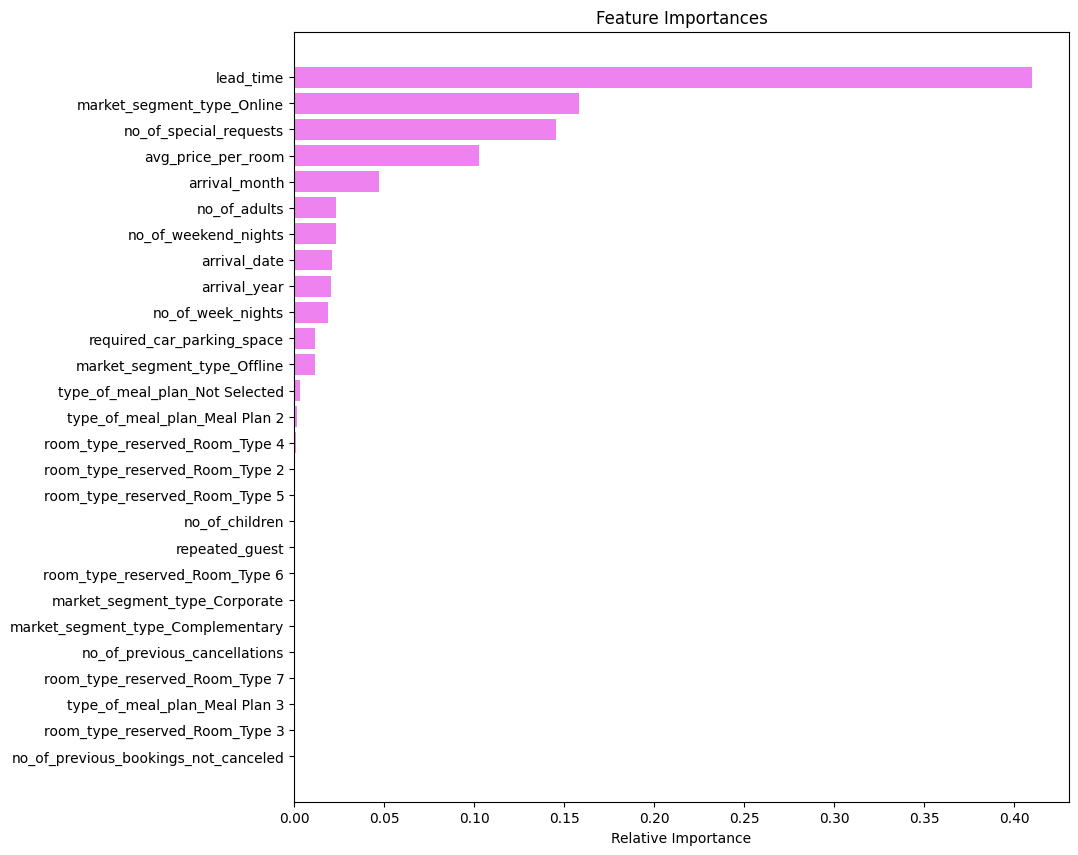

In [39]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **The lead_time, market_segment_type_Online, no_of_special_requests and avg_price_per_room are the most important features** **followed by arrival_month.**
- **The rest of the variables have no impact in this model except no_of_adults, no_of_weekend_nights, arrival_date, arrival_year, no_of_week_nights, required_car_parking_space, and market_segment_type_Offline while deciding whether a hotel booking will be canceled or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

In [40]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       0.99      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



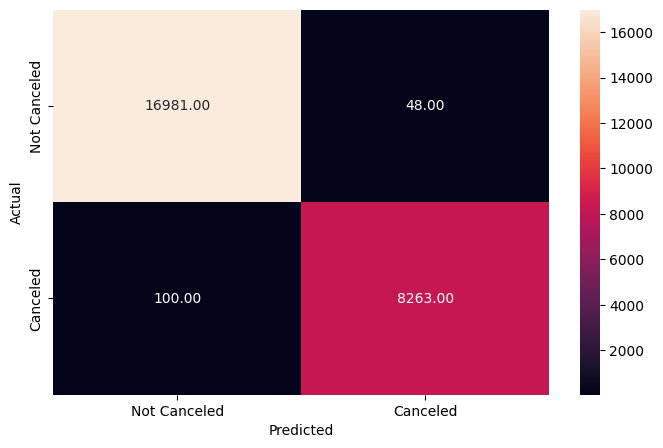

In [41]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
- Similar to the decision tree, **the random forest is giving a perfect/better performance on the training data.**
- The model is most likely overfitting to the training dataset as we observed for the decision tree.

**Let's confirm this by checking its performance on the testing data**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7361
           1       0.88      0.81      0.85      3522

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



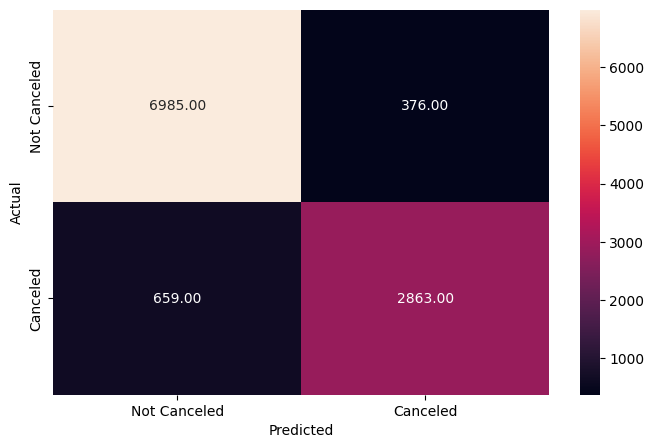

In [42]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
- Comparatively, the results from random forest classifier were decent on both training and testing data.
- It has higher F1_Score on the testing data.

**Let's see if we can able to get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [43]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [44]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       n_estimators=90, random_state=7)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     17029
           1       0.84      0.73      0.78      8363

    accuracy                           0.86     25392
   macro avg       0.86      0.83      0.84     25392
weighted avg       0.86      0.86      0.86     25392



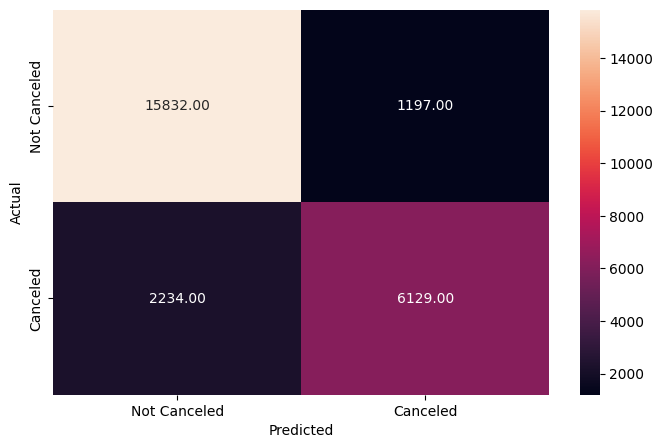

In [45]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7361
           1       0.82      0.72      0.77      3522

    accuracy                           0.86     10883
   macro avg       0.85      0.82      0.83     10883
weighted avg       0.86      0.86      0.86     10883



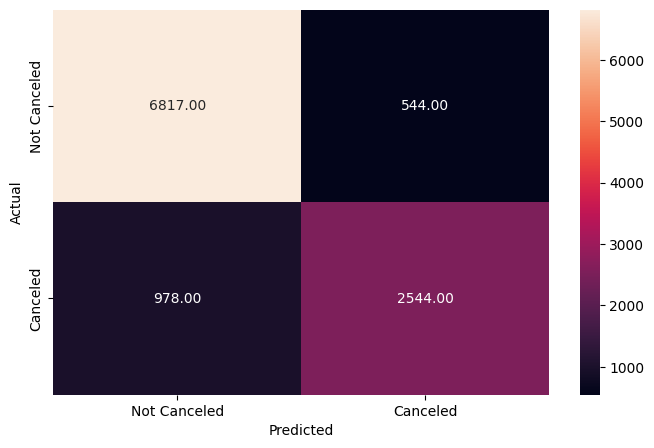

In [46]:
# Checking performance on the training data
y_pred_test4 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:**
- We can see that after hyperparameter tuning, the model score was decreased but it has less variance.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.**

**Note:** The below code might take some time to run depending on your system's configuration.

In [47]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [48]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17029
           1       0.78      0.78      0.78      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.84      0.84     25392
weighted avg       0.86      0.86      0.86     25392



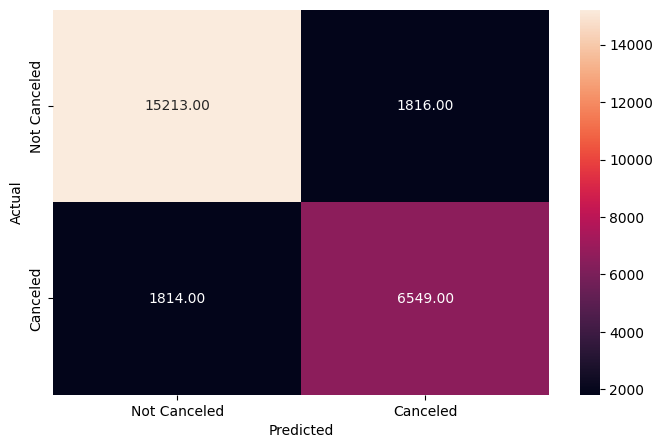

In [49]:
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**
- We can see that there is no difference in the score or performance of the model.
- **The recall and precision for class 1 are balanced**.


**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7361
           1       0.78      0.78      0.78      3522

    accuracy                           0.86     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.86      0.86      0.86     10883



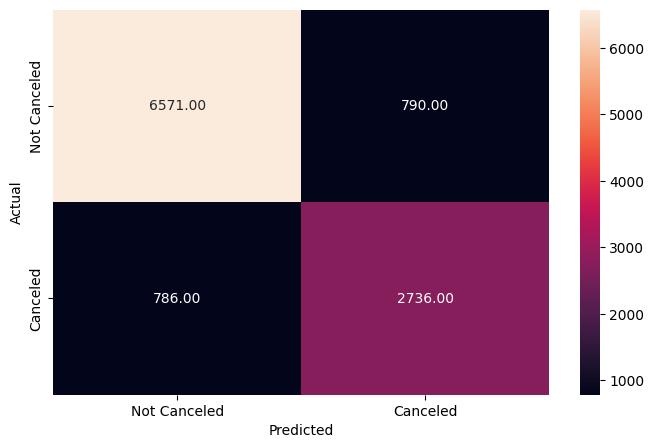

In [50]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
- **The f1 score is very similar for random forest with default parameters and tuned random forest models. Both models can be potential models for identifying** the booking which is going to get canceled.

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

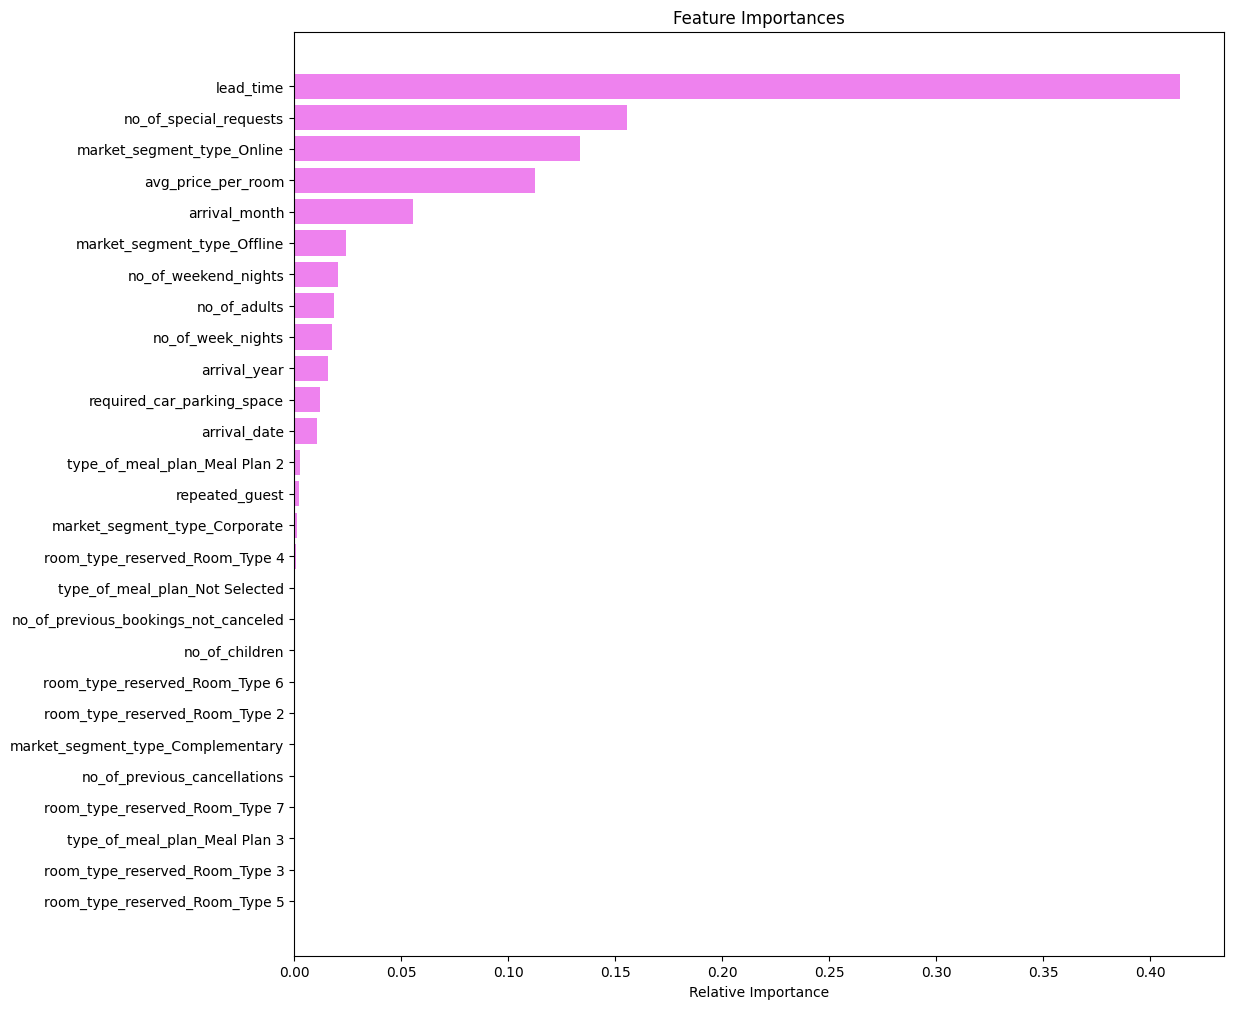

In [51]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **lead_time, no_of_special_requests, market_segment_type_Online, and avg_price_per_room are the top four features** that help distinguish between canceled and not canceled bookings.

- Similar to the decision tree, **the random forest also giving some importance to other variables like arrival_month, market_segment_type_Online, no_of_weekend_nights, no_of_adults, no_of_week_nights, arrival_year as well.**

### **Write the conclusion on the key factors that are driving the cancellations and write your recommendations to the business on how they can minimize the number of cancellations**

## **Conclusion:**

* We have been able to build tree-based models that can be used by the hotel to predict which bookings are likely to be canceled and know the important marketing policies accordingly.

* The random forest model is giving the highest F1 score of 85% and the macro average of 89% on the test data.

* Looking at important variables, based on the feature importances, we can say that the lead_time, no_of_special_requests, market_segment_type_Online, and avg_price_per_room, are the major drivers of the model.

* The Decision tree model is highly overfitting the training data and gives an F1 score of 81% on the test data. The tuned Decision Tree model is very balanced and gives more generalized results on both training and testing data.

* Using the tuned random forest model which has a 78% F1 score with balanced precision and recall scores, the hotel will be able to predict which bookings will be and will not be canceled. The hotel will be able to maintain a balance between resources and brand equity.

## **Recommendations:**

1. The lead time can play a key role in identifying if a booking will be canceled or not. We observed that the bookings where a customer has made the booking well before the date of arrival are more likely to be canceled.
    * The hotel can contact such customers before the arrival date for re-confirmation of their bookings. The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customer's requests.


2. Stricter cancellation policies can be adopted by the hotel.
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis, high percentage of bookings done online are canceled. The booking canceled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fees, etc. should be highlighted on the website / app before a customer confirms their booking to safeguard guest's interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting canceled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In December and January, the cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. October and September saw the highest number of bookings but also high number of cancellations. This should be investigated further by the hotel.


6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show the guests the level of attention and care they would receive at the hotel.
    * To give guests a personalized experience, information about local events, nearby places to explore, etc. can be shared from time to time.


7. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeat customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth and require almost no marketing cost. Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers special discounts, access to services in hotels, etc. for these customers can help in improving their experience.